In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import gutenberg, stopwords
from collections import Counter
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

## Read files

In [2]:
f1 = open('A Study In Scarlet by Arthur Conan Doyle.txt','r+',encoding='UTF-8')
scarlet = f1.read()
# f2 = open('''Alice's Adventures in Wonderland by Lewis Carroll.txt''','r+',encoding='UTF-8')
# alice = f2.read()
f3 = open('Eminent Victorians by Lytton Strachey.txt','r+',encoding='UTF-8')
victorians = f3.read()
f4 = open('Knights of Art by Amy Steedman.txt','r+',encoding='UTF-8')
knights = f4.read()
f5 = open('Prince Henry the Navigator by Raymond Beazley.txt','r+',encoding='UTF-8')
navigator = f5.read()
f6 = open('Real Soldiers of Fortune by Richard Harding Davis.txt','r+',encoding='UTF-8')
soldiers = f6.read()
f7 = open('Saint Augustin by Louis Bertrand.txt','r+',encoding='UTF-8')
augustin = f7.read()
f8 = open('Sense and Sensibility by Jane Austen.txt','r+',encoding='UTF-8')
sense = f8.read()
f9 = open('Seven Wives and Seven Prisons by LA Abbott.txt','r+',encoding='UTF-8')
wives = f9.read()
f10 = open('The Ball and the Cross by G. K. Chesterton.txt','r+',encoding='UTF-8')
ball = f10.read()
f11 = open('The life of Froude by Herbert Paul.txt','r+',encoding='UTF-8')
froude = f11.read()
f12 = open('''The Parent's Assistant by Maria Edgeworth.txt''','r+',encoding='UTF-8')
parents = f12.read()
f13 = open('William Lloyd Garrison The Abolitionist by Archibald Grimke.txt','r+',encoding='UTF-8')
abolitionist = f13.read()

titles = [scarlet,victorians,knights,navigator,soldiers,augustin,sense,wives,
          ball,froude,parents,abolitionist]
for title in titles:
    print('\nRaw ********************************:\n', title[0:1000])


Raw ********************************:
 ﻿The Project Gutenberg EBook of A Study In Scarlet, by Arthur Conan Doyle

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: A Study In Scarlet

Author: Arthur Conan Doyle

Posting Date: July 12, 2008 [EBook #244]
Release Date: April, 1995
Last Updated: September 30, 2016

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK A STUDY IN SCARLET ***




Produced by Roger Squires





A STUDY IN SCARLET.

By A. Conan Doyle

[1]



     Original Transcriber’s Note: This etext is prepared directly
     from an 1887 edition, and care has been taken to duplicate the
     original exactly, including typographical and punctuation
     vagaries.

     Additions to the text include adding the underscore character t

Journey. W

Raw ********************************:
 ﻿The Project Gutenberg EBook of The Ball and The Cross, by G.K. Chesterton

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: The Ball and The Cross

Author: G.K. Chesterton

Release Date: March, 2004 [EBook #5265]
Posting Date: March 24, 2009
Last Updated: March 9, 2018

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK THE BALL AND THE CROSS ***




Produced by Ben Crowder







THE BALL AND THE CROSS

G.K. Chesterton



CONTENTS

    I. A Discussion Somewhat in the Air
   II. The Religion of the Stipendiary Magistrate
  III. Some Old Curiosities
   IV. A Discussion at Dawn
    V. The Peacemaker
   VI. The Other Philosopher
  VII. The Village of Grassley-in-the-Hole
 VIII. An Interlude o

It seems like all texts that we downloaded from gutenberg.org have more stuff at each beginning than raw books in gutenberg pacakge. Including titles, preface, table of contents, author biography,index, appendix, gutenberg project-relative info, and some legal disclamation. I think we can just cut them off.

In [3]:
#Cutting off the head and tail of each book, where it contains all kind of other info instead of 
#book content itself. Those numbers are found by using len(bookname), print(bookname[number:]) and
#print(bookname[0:number])

scarlet = scarlet[1775:238100]
#alice = alice[710:143948]
victorians = victorians[7902:567210]
knights = knights[9151:245115]
navigator = navigator[33220:476500]
soldiers = soldiers[697:257290]
augustin = augustin[4073:586130]
sense = sense[17742:670740]
wives = wives[6970:215402]
ball = ball[1260:441365]
froude = froude[2495:633470]
parents = parents[9316:913058]
abolitionist = abolitionist[3950:612780]

titles = [scarlet,victorians,knights,navigator,soldiers,augustin,sense,wives,
          ball,froude,parents,abolitionist]
for title in titles:
    print('\nRaw ********************************:\n', title[0:1000])


Raw ********************************:
 
PART I.

(_Being a reprint from the reminiscences of_ JOHN H. WATSON, M.D., _late
of the Army Medical Department._) [2]




CHAPTER I. MR. SHERLOCK HOLMES.


IN the year 1878 I took my degree of Doctor of Medicine of the
University of London, and proceeded to Netley to go through the course
prescribed for surgeons in the army. Having completed my studies there,
I was duly attached to the Fifth Northumberland Fusiliers as Assistant
Surgeon. The regiment was stationed in India at the time, and before
I could join it, the second Afghan war had broken out. On landing at
Bombay, I learned that my corps had advanced through the passes, and
was already deep in the enemy’s country. I followed, however, with many
other officers who were in the same situation as myself, and succeeded
in reaching Candahar in safety, where I found my regiment, and at once
entered upon my new duties.

The campaign brought honours and promotion to many, but for me it had
noth

September, 

Raw ********************************:
 

I. A DISCUSSION SOMEWHAT IN THE AIR

The flying ship of Professor Lucifer sang through the skies like a
silver arrow; the bleak white steel of it, gleaming in the bleak
blue emptiness of the evening. That it was far above the earth was no
expression for it; to the two men in it, it seemed to be far above the
stars. The professor had himself invented the flying machine, and had
also invented nearly everything in it. Every sort of tool or apparatus
had, in consequence, to the full, that fantastic and distorted look
which belongs to the miracles of science. For the world of science and
evolution is far more nameless and elusive and like a dream than the
world of poetry and religion; since in the latter images and ideas
remain themselves eternally, while it is the whole idea of evolution
that identities melt into each other as they do in a nightmare.

All the tools of Professor Lucifer were the ancient human tools gone
mad, grown into u

Now Let's clean up some common patterns

In [4]:
# This pattern matches all text between square brackets.
pattern = "[\[].*?[\]]"
scarlet = re.sub(pattern, "", scarlet)
victorians = re.sub(pattern, "", victorians)
knights = re.sub(pattern, "", knights)
navigator = re.sub(pattern, "", navigator)
soldiers = re.sub(pattern, "", soldiers)
augustin = re.sub(pattern, "", augustin)
sense = re.sub(pattern, "", sense)
wives = re.sub(pattern, "", wives)
ball = re.sub(pattern, "", ball)
froude = re.sub(pattern, "", froude)
parents = re.sub(pattern, "", parents)
abolitionist = re.sub(pattern, "", abolitionist)

scarlet = re.sub(r'CHAPTER.*', "", scarlet)
victorians = re.sub(r'CHAPTER.*', "", victorians)
knights = re.sub(r'CHAPTER.*', "", knights)
navigator = re.sub(r'CHAPTER.*', "", navigator)
soldiers = re.sub(r'CHAPTER.*', "", soldiers)
augustin = re.sub(r'CHAPTER.*', "", augustin)
sense = re.sub(r'CHAPTER.*', "", sense)
wives = re.sub(r'CHAPTER.*', "", wives)
ball = re.sub(r'CHAPTER.*', "", ball)
froude = re.sub(r'CHAPTER.*', "", froude)
parents = re.sub(r'CHAPTER.*', "", parents)
abolitionist = re.sub(r'CHAPTER.*', "", abolitionist)

#######################################################################################################
#Now, let's clean up each book one by one

scarlet = re.sub('[]*()_[-]', '', scarlet) # Brackets
scarlet = re.sub('PART.*', '', scarlet) # Title with words 'Part'

victorians = re.sub('[]*()_[-]','', victorians) # Brackets
victorians = re.sub('\n[MDCLXVI]+\n','', victorians,re.MULTILINE)  # Roman Numerals

knights = re.sub('[]*()_[-]','', knights) # Brackets
knights = re.sub('\n[A-Z\s]+\n','', knights) # Capital titles

navigator = re.sub('[]*()_[-]','', navigator) # Brackets
navigator = re.sub('\n.*[A-Z][.].*\n','', navigator)  # Capital titles
navigator = re.sub('Footnote .*:','',navigator) #Footnote with numbers
navigator = re.sub('\n\d','',navigator) # Number in front of footnotes

soldiers = re.sub('[]*()_[-]','', soldiers) # Brackets
soldiers = re.sub('\n[A-Z].*\n\n','', soldiers) # Capital Titles

augustin = re.sub('[]*()_[-]','', augustin) # Brackets
augustin = re.sub('\n[MDCLXVI]+\n','', augustin) # Roman Numerals
augustin = re.sub('\n[A-Z].*[A-Z]\n\n','', augustin)# Capital titles
augustin = re.sub('\n[A-Z].*[A-Z]\n','', augustin) # Titles in different form
augustin = re.sub('Confessions.*','', augustin) # Lines that repetive

sense = re.sub('[]*()_[-]','', sense) # Brackets

wives = re.sub('.*[-][-].*[A-Z][-][-].*','', wives) # Capital title in the form [-][-][A-Z][-][-]
wives = re.sub('\n.*[A-Z][.]\n\n','', wives) # Residuals from the last function
wives = re.sub('[]*()_[-]','', wives) # Rest brackets
wives = wives[35:]  # Simply cut off the title

ball = re.sub('\n[MDCLXVI]+[.].*\n\n','', ball) # Title for each chapter
ball = re.sub('[]*()_[-]','', ball) # Brackets

froude = re.sub('[-].*\n[*].*\n.*','', froude) # Appendix footnote
froude = re.sub('\n[A-Z].*\n\n','', froude) # Capital letter Titles
froude = re.sub('[]*()_[-]','', froude) # Brackets

parents = re.sub('\n[A-Z].*[.]\n\n','', parents) # Capital letter Titles
parents = re.sub('[]*()_[-]','', parents) # Brackets

abolitionist = re.sub('\n[A-Z]+[ ].*\n\n','', abolitionist) # Capital letter Titles
abolitionist = re.sub('[]*()_[-]','', abolitionist) # Brackets

#Clean up all numeral characters
scarlet = re.sub(r'\d', "", scarlet)
victorians = re.sub(r'\d', "", victorians)
knights = re.sub(r'\d', "", knights)
navigator = re.sub(r'\d', "", navigator)
soldiers = re.sub(r'\d', "", soldiers)
augustin = re.sub(r'\d', "", augustin)
sense = re.sub(r'\d', "", sense)
wives = re.sub(r'\d', "", wives)
ball = re.sub(r'\d', "", ball)
froude = re.sub(r'\d', "", froude)
parents = re.sub(r'\d', "", parents)
abolitionist = re.sub(r'\d', "", abolitionist)

In [5]:
#Remove the extra whitespace
scarlet = ' '.join(scarlet.split())
victorians = ' '.join(victorians.split())
knights = ' '.join(knights.split())
navigator = ' '.join(navigator.split())
soldiers = ' '.join(soldiers.split())
augustin = ' '.join(augustin.split())
sense = ' '.join(sense.split())
wives = ' '.join(wives.split())
ball = ' '.join(ball.split())
froude = ' '.join(froude.split())
parents = ' '.join(parents.split())
abolitionist = ' '.join(abolitionist.split())

#Turn all words into lower case before tokenization
scarlet = scarlet.lower()
victorians = victorians.lower()
knights = knights.lower()
navigator = navigator.lower()
soldiers = soldiers.lower()
augustin = augustin.lower()
sense = sense.lower()
wives = wives.lower()
ball = ball.lower()
froude = froude.lower()
parents = parents.lower()
abolitionist = abolitionist.lower()

#Print out texts to see the results
titles = [scarlet,victorians,knights,navigator,soldiers,augustin,sense,wives,
          ball,froude,parents,abolitionist]
for title in titles:
    print('\nRaw ********************************:\n', title[0:1000])


Raw ********************************:
 being a reprint from the reminiscences of john h. watson, m.d., late of the army medical department. in the year i took my degree of doctor of medicine of the university of london, and proceeded to netley to go through the course prescribed for surgeons in the army. having completed my studies there, i was duly attached to the fifth northumberland fusiliers as assistant surgeon. the regiment was stationed in india at the time, and before i could join it, the second afghan war had broken out. on landing at bombay, i learned that my corps had advanced through the passes, and was already deep in the enemy’s country. i followed, however, with many other officers who were in the same situation as myself, and succeeded in reaching candahar in safety, where i found my regiment, and at once entered upon my new duties. the campaign brought honours and promotion to many, but for me it had nothing but misfortune and disaster. i was removed from my brigade a

 some one has said that if any man would faithfully write his autobiography, giving truly his own history and experiences, the ills and joys, the haps and mishaps that had fallen to his lot, he could not fail to make an interesting story; and disraeli makes sidonia say that there is romance in every life. how much romance, as well as sad reality, there is in the life of a man who, among other experiences, has married seven wives, and has been seven times in prisonsolely on account of the seven wives, may be learned from the pages that follow. i was born in the town of chatham, columbia county, new york, in september, . my father was a new englander, who married three times, and i was the eldest son of his third wife, a woman of dutch descent, or, as she would have boosted if she had been rich, one of the old knickerbockers of new york. my parents were simply honest, hardworking, worthy people, who earned a good livelihood, brought up their children to work, behaved themselves, and were

In [6]:
# scarletraw = [scarlet]
# tempdf = vectorizer.fit_transform(scarletraw)
# s = tempdf.toarray()
# scardf = pd.DataFrame(s)
# scardf.columns = [vectorizer.get_feature_names()]
# scardf.index = ['scar_ArthurDoyle']
# scardf

In [7]:
# victoriansraw = [victorians]
# tempdf2 = vectorizer.fit_transform(victoriansraw)
# v = tempdf2.toarray()
# vicdf = pd.DataFrame(v)
# vicdf.columns = [vectorizer.get_feature_names()]
# vicdf.index = ['vic_LyttonStrachey']
# vicdf

In [8]:
# train = pd.concat([scardf, vicdf], axis = 0)

In [9]:
nltk.download('wordnet')

import nltk.data
from nltk.stem import WordNetLemmatizer

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

#Using nltk tokenizer to separate each corpus into sentences

scarletsentence = tokenizer.tokenize(scarlet)
victorianssentence = tokenizer.tokenize(victorians)
knightssentence = tokenizer.tokenize(knights)
navigatorsentence = tokenizer.tokenize(navigator)
soldierssentence = tokenizer.tokenize(soldiers)
augustinsentence = tokenizer.tokenize(augustin)
sensesentence = tokenizer.tokenize(sense)
wivessentence = tokenizer.tokenize(wives)
ballsentence = tokenizer.tokenize(ball)
froudsentence = tokenizer.tokenize(froude)
parentssentence = tokenizer.tokenize(parents)
abolitionistsentence = tokenizer.tokenize(abolitionist)

[nltk_data] Downloading package wordnet to C:\Users\me-
[nltk_data]     fa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
nlp = spacy.load('en', disable=['parser', 'ner'])

#Lemmatize Scarlet
scarletList = []
for sent in scarletsentence:
    doc = nlp(sent)
    lemma_output = " ".join([token.lemma_ for token in doc])
    scarletList.append(lemma_output)
    
#Lemmatize Victorian
vicList = []
for sent in victorianssentence:
    doc = nlp(sent)
    lemma_output = " ".join([token.lemma_ for token in doc])
    vicList.append(lemma_output)

#Lemmatize Knights
knightsList = []
for sent in knightssentence:
    doc = nlp(sent)
    lemma_output = " ".join([token.lemma_ for token in doc])
    knightsList.append(lemma_output)
    
#Lemmatize Navigator
naviList = []
for sent in navigatorsentence:
    doc = nlp(sent)
    lemma_output = " ".join([token.lemma_ for token in doc])
    naviList.append(lemma_output)
    
#Lemmatize Soldiers
soldierList = []
for sent in soldierssentence:
    doc = nlp(sent)
    lemma_output = " ".join([token.lemma_ for token in doc])
    soldierList.append(lemma_output)
    
#Lemmatize Augustin
augustinList = []
for sent in augustinsentence:
    doc = nlp(sent)
    lemma_output = " ".join([token.lemma_ for token in doc])
    augustinList.append(lemma_output)
    
#Lemmatize Sense
senseList = []
for sent in sensesentence:
    doc = nlp(sent)
    lemma_output = " ".join([token.lemma_ for token in doc])
    senseList.append(lemma_output)
    
#Lemmatize Wives
wivesList = []
for sent in wivessentence:
    doc = nlp(sent)
    lemma_output = " ".join([token.lemma_ for token in doc])
    wivesList.append(lemma_output)
    
#Lemmatize Ball
ballList = []
for sent in ballsentence:
    doc = nlp(sent)
    lemma_output = " ".join([token.lemma_ for token in doc])
    ballList.append(lemma_output)
    
#Lemmatize Froude
froudList = []
for sent in froudsentence:
    doc = nlp(sent)
    lemma_output = " ".join([token.lemma_ for token in doc])
    froudList.append(lemma_output)
    
#Lemmatize Parents
parentList = []
for sent in parentssentence:
    doc = nlp(sent)
    lemma_output = " ".join([token.lemma_ for token in doc])
    parentList.append(lemma_output)
    
#Lemmatize Abolitionist
aboList = []
for sent in abolitionistsentence:
    doc = nlp(sent)
    lemma_output = " ".join([token.lemma_ for token in doc])
    aboList.append(lemma_output)

In [11]:
#Define our vectorizer
vectorizer = CountVectorizer(stop_words = {'English'},min_df = 1,
                             max_features = 2000,ngram_range = (1,4))
# Each section within two star lines does the same thing as the first section.
#*****************************************************************************************************
scarletdf = pd.DataFrame(scarletList)     #Convert our text into dataframe
scarletdf['author'] = 'scar_ArthurDoyle'  #Create an author feature
scarletdf.columns = ['sentences','author']   #Rename our columns
tempdf = vectorizer.fit_transform(scarletList)   #Fit our data to vectorizer
v = tempdf.toarray()   # Convert scipy sparse matric to numpy array so we can see them
scarlet_vec = pd.DataFrame(v)   #convert array to panda dataframe
scarlet_vec.columns = [vectorizer.get_feature_names()]   #Assigne each feature name as column names
scarlet_vec['sentences'] = scarletdf['sentences']   #Combine new word frequency data frame with sentence
scarlet_vec['author'] = scarletdf['author']   # and author names, so we can use them as target variable
#*****************************************************************************************************
vicdf = pd.DataFrame(vicList)            # Same as above
vicdf['author'] = 'vic_LyttonStrachey'
vicdf.columns = ['sentences','author']
tempdf = vectorizer.fit_transform(vicList)
v = tempdf.toarray()
vic_vec = pd.DataFrame(v)
vic_vec.columns = [vectorizer.get_feature_names()]
vic_vec['sentences'] = vicdf['sentences']
vic_vec['author'] = vicdf['author']
#*****************************************************************************************************
knightsdf = pd.DataFrame(knightsList)         # Same as above
knightsdf['author'] = 'kni_AmySteedman'
knightsdf.columns = ['sentences','author']
tempdf = vectorizer.fit_transform(knightsList)
v = tempdf.toarray()
knights_vec = pd.DataFrame(v)
knights_vec.columns = [vectorizer.get_feature_names()]
knights_vec['sentences'] = knightsdf['sentences']
knights_vec['author'] = knightsdf['author']
#*****************************************************************************************************
navidf = pd.DataFrame(naviList)              # Same as above
navidf['author'] = 'navi_RaymondBeazley'
navidf.columns = ['sentences','author']
tempdf = vectorizer.fit_transform(naviList)
v = tempdf.toarray()
navi_vec = pd.DataFrame(v)
navi_vec.columns = [vectorizer.get_feature_names()]
navi_vec['sentences'] = navidf['sentences']
navi_vec['author'] = navidf['author']
#*****************************************************************************************************
soldierdf = pd.DataFrame(soldierList)              # Same as above
soldierdf['author'] = 'sol_RichardDavis'
soldierdf.columns = ['sentences','author']
tempdf = vectorizer.fit_transform(soldierList)
v = tempdf.toarray()
soldier_vec = pd.DataFrame(v)
soldier_vec.columns = [vectorizer.get_feature_names()]
soldier_vec['sentences'] = soldierdf['sentences']
soldier_vec['author'] = soldierdf['author']
#*****************************************************************************************************
augustindf = pd.DataFrame(augustinList)              # Same as above
augustindf['author'] = 'aug_LouisBertrand'
augustindf.columns = ['sentences','author']
tempdf = vectorizer.fit_transform(augustinList)
v = tempdf.toarray()
augustin_vec = pd.DataFrame(v)
augustin_vec.columns = [vectorizer.get_feature_names()]
augustin_vec['sentences'] = augustindf['sentences']
augustin_vec['author'] = augustindf['author']
#*****************************************************************************************************
sensedf = pd.DataFrame(senseList)              # Same as above
sensedf['author'] = 'sense_JaneAusten'
sensedf.columns = ['sentences','author']
tempdf = vectorizer.fit_transform(senseList)
v = tempdf.toarray()
sense_vec = pd.DataFrame(v)
sense_vec.columns = [vectorizer.get_feature_names()]
sense_vec['sentences'] = sensedf['sentences']
sense_vec['author'] = sensedf['author']
#*****************************************************************************************************
wivesdf = pd.DataFrame(wivesList)              # Same as above
wivesdf['author'] = 'wives_LAAbbott'
wivesdf.columns = ['sentences','author']
tempdf = vectorizer.fit_transform(wivesList)
v = tempdf.toarray()
wives_vec = pd.DataFrame(v)
wives_vec.columns = [vectorizer.get_feature_names()]
wives_vec['sentences'] = wivesdf['sentences']
wives_vec['author'] = wivesdf['author']
#*****************************************************************************************************
balldf = pd.DataFrame(ballList)              # Same as above
balldf['author'] = 'ball_GKChesterton'
balldf.columns = ['sentences','author']
tempdf = vectorizer.fit_transform(ballList)
v = tempdf.toarray()
ball_vec = pd.DataFrame(v)
ball_vec.columns = [vectorizer.get_feature_names()]
ball_vec['sentences'] = balldf['sentences']
ball_vec['author'] = balldf['author']
#*****************************************************************************************************
froudedf = pd.DataFrame(froudList)              # Same as above
froudedf['author'] = 'frou_HerbertPaul'
froudedf.columns = ['sentences','author']
tempdf = vectorizer.fit_transform(froudList)
v = tempdf.toarray()
froude_vec = pd.DataFrame(v)
froude_vec.columns = [vectorizer.get_feature_names()]
froude_vec['sentences'] = froudedf['sentences']
froude_vec['author'] = froudedf['author']
#*****************************************************************************************************
parentdf = pd.DataFrame(parentList)              # Same as above
parentdf['author'] = 'pare_MariaEdgeworth'
parentdf.columns = ['sentences','author']
tempdf = vectorizer.fit_transform(parentList)
v = tempdf.toarray()
parent_vec = pd.DataFrame(v)
parent_vec.columns = [vectorizer.get_feature_names()]
parent_vec['sentences'] = parentdf['sentences']
parent_vec['author'] = parentdf['author']
#*****************************************************************************************************
abolitionistdf = pd.DataFrame(aboList)              # Same as above
abolitionistdf['author'] = 'abo_ArchibaldGrimke'
abolitionistdf.columns = ['sentences','author']
tempdf = vectorizer.fit_transform(aboList)
v = tempdf.toarray()
abolitionist_vec = pd.DataFrame(v)
abolitionist_vec.columns = [vectorizer.get_feature_names()]
abolitionist_vec['sentences'] = abolitionistdf['sentences']
abolitionist_vec['author'] = abolitionistdf['author']
#*****************************************************************************************************

In [12]:
train_df = pd.concat([scarlet_vec,vic_vec,knights_vec,navi_vec,soldier_vec,
                   augustin_vec,sense_vec,wives_vec,ball_vec,froude_vec,
                   parent_vec,abolitionist_vec], axis = 0)

col_levels = list(train_df.columns.levels)
train_df.columns = list(col_levels[0])
train_df = train_df.fillna(0)
train_df.shape

(43951, 8693)

In [13]:
train_df.loc[train_df.author == 'scar_ArthurDoyle', 'author_number'] = 1
train_df.loc[train_df.author == 'vic_LyttonStrachey', 'author_number'] = 2
train_df.loc[train_df.author == 'kni_AmySteedman', 'author_number'] = 3
train_df.loc[train_df.author == 'navi_RaymondBeazley', 'author_number'] = 4
train_df.loc[train_df.author == 'sol_RichardDavis', 'author_number'] = 5
train_df.loc[train_df.author == 'aug_LouisBertrand', 'author_number'] = 6
train_df.loc[train_df.author == 'sense_JaneAusten', 'author_number'] = 7
train_df.loc[train_df.author == 'wives_LAAbbott', 'author_number'] = 8
train_df.loc[train_df.author == 'ball_GKChesterton', 'author_number'] = 9
train_df.loc[train_df.author == 'frou_HerbertPaul', 'author_number'] = 10
train_df.loc[train_df.author == 'pare_MariaEdgeworth', 'author_number'] = 11
train_df.loc[train_df.author == 'abo_ArchibaldGrimke', 'author_number'] = 12

In [14]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import plot_importance

Y = train_df['author_number'].values.ravel()
X = train_df.drop(['author','sentences','author_number'], axis = 1)

Text(0.5,1,'Component-wise and Cumulative Explained Variance')

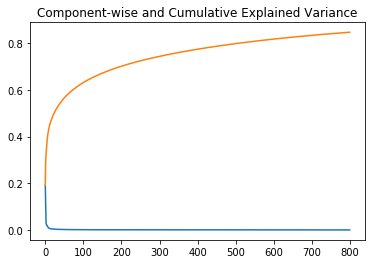

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=800)
pca_result = pca.fit_transform(train_df.drop(['author','sentences','author_number'], axis = 1).T)
plt.plot(range(800), pca.explained_variance_ratio_)
plt.plot(range(800), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

In [ ]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X, Y)

In [ ]:
print(cross_val_score(rfc, X, Y, cv=5, n_jobs=-1, scoring = 'accuracy'))

In [25]:
train_df.shape

(43951, 8694)

In [24]:
pca.components_.shape

(800, 8691)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [ ]:
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 13,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 6,
    'silent': 1,
    'seed': 1000
}

plst = params.items()


dtrain = xgb.DMatrix(X_train, y_train)
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)

# 计算准确率
cnt1 = 0
cnt2 = 0
for i in range(len(y_test)):
    if ans[i] == y_test[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# 显示重要特征
plot_importance(model)
plt.show()

In [ ]:
gbm0 = GradientBoostingClassifier(random_state=10)
gbm0.fit(X_train,y_train)

In [29]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

Training set score: 0.9860447478194918

Test set score: 0.46885842671065353


In [30]:
print(cross_val_score(rfc, X, Y, cv=5, n_jobs=-1, scoring = 'accuracy'))

[0.39022172 0.45758472 0.44516496 0.42910787 0.42520492]


In [ ]:
# Import the model.
from sklearn.neural_network import MLPClassifier

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(hidden_layer_sizes=(1000,))
mlp.fit(X, Y)

In [ ]:
print(cross_val_score(mlp, X, Y, cv=5, n_jobs=-1, scoring = 'accuracy'))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=10, weights='distance')
neighbors.fit(X_train, y_train.values.ravel())
print('Training set score:', neighbors.score(X_train, y_train))
print('\nTest set score:', neighbors.score(X_test, y_test))

In [22]:
# nlp = spacy.load('en')

# # All the processing work is done here, so it may take a while.
# scarlet_doc = nlp(scarlet)
# victorians_doc = nlp(victorians)
# knights_doc = nlp(knights)
# navigator_doc = nlp(navigator)
# soldiers_doc = nlp(soldiers)
# augustin_doc = nlp(augustin)
# sense_doc = nlp(sense)
# wives_doc = nlp(wives)
# ball_doc = nlp(ball)
# froude_doc = nlp(froude)
# parents_doc = nlp(parents)
# abolitionist_doc = nlp(abolitionist)

In [23]:
# # Group into sentences.
# scarlet_sents = [[sent, "scar_ArthurDoyle"] for sent in scarlet_doc.sents]
# victorians_sents = [[sent, "vic_LyttonStrachey"] for sent in victorians_doc.sents]
# knights_sents = [[sent, "kni_AmySteedman"] for sent in knights_doc.sents]
# navigator_sents = [[sent, "navi_RaymondBeazley"] for sent in navigator_doc.sents]
# soldiers_sents = [[sent, "sol_RichardDavis"] for sent in soldiers_doc.sents]
# augustin_sents = [[sent, "aug_LouisBertrand"] for sent in augustin_doc.sents]
# sense_sents = [[sent, "sense_JaneAusten"] for sent in sense_doc.sents]
# wives_sents = [[sent, "wives_LAAbbott"] for sent in wives_doc.sents]
# ball_sents = [[sent, "ball_GKChesterton"] for sent in ball_doc.sents]
# froude_sents = [[sent, "frou_HerbertPaul"] for sent in froude_doc.sents]
# parents_sents = [[sent, "pare_MariaEdgeworth"] for sent in parents_doc.sents]
# abolitionist_sents = [[sent, "abo_ArchibaldGrimke"] for sent in abolitionist_doc.sents]

# # Combine the sentences from the two novels into one data frame.
# sentences = pd.DataFrame(scarlet_sents + victorians_sents + knights_sents + navigator_sents 
#                          + soldiers_sents + augustin_sents + sense_sents + wives_sents + ball_sents 
#                          + froude_sents + parents_sents + abolitionist_sents)
# sentences.columns = ['sentences','authur']
# sentences.head()

In [61]:
# Let's explore the objects we've built.
print("The scarlet_doc object is a {} object.".format(type(scarlet_doc)))
print("It is {} tokens long".format(len(scarlet_doc)))
print("The first three tokens are '{}'".format(scarlet_doc[:100]))
print("The type of each token is {}".format(type(scarlet_doc[0])))

The scarlet_doc object is a <class 'spacy.tokens.doc.Doc'> object.
It is 43042 tokens long
The first three tokens are 'being a reprint from the reminiscences of john h. watson, m.d., late of the army medical department. in the year 1878 i took my degree of doctor of medicine of the university of london, and proceeded to netley to go through the course prescribed for surgeons in the army. having completed my studies there, i was duly attached to the fifth northumberland fusiliers as assistant surgeon. the regiment was stationed in india at the time, and before i could join it, the second afghan war had broken out. on'
The type of each token is <class 'spacy.tokens.token.Token'>


In [11]:
from collections import Counter

# Utility function to calculate how frequently words appear in the text.
def word_frequencies(text, include_stop=True):
    
    # Build a list of words.
    # Strip out punctuation and, optionally, stop words.
    words = []
    for token in text:
        if not token.is_punct and (not token.is_stop or include_stop):
            words.append(token.text)
            
    # Build and return a Counter object containing word counts.
    return Counter(words)

# Use our optional keyword argument to remove stop words.
sense_freq = word_frequencies(sense_doc, include_stop=False).most_common(10)
parents_freq = word_frequencies(parents_doc, include_stop=False).most_common(10)
print('Sense:', sense_freq)
print('Parents Assistant:', parents_freq)

Sense: [('I', 1984), ("'s", 698), ('Elinor', 679), ('Marianne', 564), ('Mrs.', 526), ('said', 392), ('But', 283), ('sister', 280), ('mother', 257), ('She', 257)]
Parents Assistant: [('I', 3611), ("'s", 1425), ('said', 1425), ("n't", 578), ('The', 541), ('Mr.', 454), ('good', 423), ('know', 415), ('little', 400), ("'ll", 329)]


In [12]:
# Pull out just the text from our frequency lists.
sense_common = [pair[0] for pair in sense_freq]
parents_common = [pair[0] for pair in parents_freq]

# Use sets to find the unique values in each top ten.
print('Unique to Sense:', set(sense_common) - set(parents_common))
print('Unique to Emma:', set(parents_common) - set(sense_common))

Unique to Sense: {'mother', 'Elinor', 'But', 'Mrs.', 'Marianne', 'sister', 'She'}
Unique to Emma: {'good', 'little', 'know', "'ll", 'The', 'Mr.', "n't"}


In [13]:
# Utility function to calculate how frequently lemas appear in the text.
def lemma_frequencies(text, include_stop=True):
    
    # Build a list of lemas.
    # Strip out punctuation and, optionally, stop words.
    lemmas = []
    for token in text:
        if not token.is_punct and (not token.is_stop or include_stop):
            lemmas.append(token.lemma_)
            
    # Build and return a Counter object containing word counts.
    return Counter(lemmas)

# Instantiate our list of most common lemmas.
sense_lemma_freq = lemma_frequencies(sense_doc, include_stop=False).most_common(10)
parents_lemma_freq = lemma_frequencies(parents_doc, include_stop=False).most_common(10)
print('\nSense:', sense_lemma_freq)
print('Parents Assistant:', parents_lemma_freq)

# Again, identify the lemmas common to one text but not the other.
sense_lemma_common = [pair[0] for pair in sense_lemma_freq]
parents_lemma_common = [pair[0] for pair in parents_lemma_freq]
print('Unique to Sense:', set(sense_lemma_common) - set(parents_lemma_common))
print('Unique to Parents:', set(parents_lemma_common) - set(sense_lemma_common))


Sense: [('-PRON-', 3184), ("'s", 684), ('elinor', 680), ('marianne', 564), ('mrs.', 526), ('say', 443), ('know', 384), ('think', 329), ('sister', 328), ('but', 283)]
Parents Assistant: [('-PRON-', 5028), ('say', 1531), ("'s", 927), ('be', 822), ('good', 642), ('not', 636), ('come', 633), ('know', 598), ('the', 577), ('will', 478)]
Unique to Sense: {'marianne', 'mrs.', 'but', 'think', 'sister', 'elinor'}
Unique to Parents: {'good', 'will', 'be', 'come', 'the', 'not'}


In [14]:
# Initial exploration of sentences.
sentences = list(sense_doc.sents)
print("Sense has {} sentences.".format(len(sentences)))

example_sentence = sentences[2]
print("Here is an example: \n{}\n".format(example_sentence))

Sense has 5139 sentences.
Here is an example: 
The late owner of this estate was a single man, who lived to a very advanced age, and who for many years of his life, had a constant companion and housekeeper in his sister.



In [15]:
# Look at some metrics around this sentence.
example_words = [token for token in example_sentence if not token.is_punct]
unique_words = set([token.text for token in example_words])

print(("There are {} words in this sentence, and {} of them are"
       " unique.").format(len(example_words), len(unique_words)))

There are 34 words in this sentence, and 28 of them are unique.


In [16]:
# View the part of speech for some tokens in our sentence.
print('\nParts of speech:')
for token in example_sentence[:9]:
    print(token.orth_, token.pos_)


Parts of speech:
The DET
late ADJ
owner NOUN
of ADP
this DET
estate NOUN
was VERB
a DET
single ADJ


In [17]:
# View the dependencies for some tokens.
print('\nDependencies:')
for token in example_sentence[:9]:
    print(token.orth_, token.dep_, token.head.orth_)


Dependencies:
The det owner
late amod owner
owner nsubj was
of prep owner
this det estate
estate pobj of
was ROOT was
a det man
single amod man


In [19]:
# Extract the first ten entities.
entities = list(sense_doc.ents)[0:10]
for entity in entities:
    print(entity.label_, ' '.join(t.orth_ for t in entity))

ORG Dashwood
PERSON Sussex
LOC Norland Park
DATE many years
DATE ten years
PERSON Henry Dashwood
ORG Gentleman
DATE days
PERSON Henry Dashwood
PERSON Henry Dashwood


In [20]:
# All of the uniqe entities spaCy thinks are people.
people = [entity.text for entity in list(sense_doc.ents) if entity.label_ == "PERSON"]
print(set(people))

{"Lady Middleton's", 'Ferrars DID', 'Fanny', 'Rose', 'Lucy', 'Margaret', 'May', 'Impudence', 'Pope', 'Folly', 'gum--', 'John', 'Taylor', 'Dearest Marianne', "Miss Grey's", 'Richardsons', 'Harris', 'all.--', 'Robert Ferrars', 'Marianne come?"-- Elinor', 'be.--', 'Cruel', 'Constantia', 'Miss Lucy--', 'William', 'Queen Mab', 'these:--', 'Miss Lucy', 'Avignon', 'John Willoughby', 'Whitwell', 'Miss Dashwoods', 'saying,--', 'Middletons', 'Sally', 'Whom', 'Thomas Palmer', 'Astonishment', 'Edward Ferrars', 'Dashwood WOULD', 'Anne', 'Jenning', 'Willoughby!"--', 'Miss Morton', 'Willoughby', 'Scott', 'Down', 'Combe Magna', 'Biddy Henshawe', 'Palmer', 'EDWARD Ferrars', 'Dashwood', 'Hush', 'Sussex', 'Lucy Steele', 'Betty', 'Clarke', 'Richardson', 'Miss Godby', 'Law', 'Poor Anne', 'Smith', 'Gray', 'Harry', 'Edward', 'Pratt', 'Ma', 'DID', 'Shakespeare', 'Grey', 'said,--', 'JOHN WILLOUGHBY', "Lady Middletons's", 'John Smith', 'Marianne NOW', 'Ferrars', 'Simpson', 'Elinor', 'Annamaria', 'Whatever Maria

In [21]:
# Group into sentences.
sense_sents = [[sent, "Austen"] for sent in sense_doc.sents]
parents_sents = [[sent, "Maria"] for sent in parents_doc.sents]
sense_sents = sense_sents[0:2000]
parents_sents = parents_sents[0:2000]

In [22]:
# Combine the sentences from the two novels into one data frame.
sentences = pd.DataFrame(sense_sents + parents_sents)
sentences.head()

,0,1
0,"(The, family, of, Dashwood, had, long, been, s...",Austen
1,"(Their, estate, was, large, ,, and, their, res...",Austen
2,"(The, late, owner, of, this, estate, was, a, s...",Austen
3,"(But, her, death, ,, which, happened, ten, yea...",Austen
4,"(In, the, society, of, his, nephew, and, niece...",Austen


In [24]:
# Utility function to create a list of the 2000 most common words.
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    allwords = [token.lemma_
                for token in text
                if not token.is_punct
                and not token.is_stop]
    
    # Return the most common words.
    return [item[0] for item in Counter(allwords).most_common(100)]
    

# Creates a data frame with features for each word in our common word set.
# Each value is the count of the times the word appears in each sentence.
def bow_features(sentences, common_words):
    
    # Scaffold the data frame and initialize counts to zero.
    df = pd.DataFrame(columns=common_words)
    df['text_sentence'] = sentences[0]
    df['text_source'] = sentences[1]
    df.loc[:, common_words] = 0
    
    # Process each row, counting the occurrence of words in each sentence.
    for i, sentence in enumerate(df['text_sentence']):
        
        # Convert the sentence to lemmas, then filter out punctuation,
        # stop words, and uncommon words.
        words = [token.lemma_
                 for token in sentence
                 if (
                     not token.is_punct
                     and not token.is_stop
                     and token.lemma_ in common_words
                 )]
        
        # Populate the row with word counts.
        for word in words:
            df.loc[i, word] += 1
        
        # This counter is just to make sure the kernel didn't hang.
        if i % 500 == 0:
            print("Processing row {}".format(i))
            
    return df

# Set up the bags.
sensewords = bag_of_words(sense_doc)
parentswords = bag_of_words(parents_doc)

# Combine bags to create a set of unique words.
common_words = set(sensewords + parentswords)

In [25]:
# Create our data frame with features. This can take a while to run.
word_counts = bow_features(sentences, common_words)
word_counts.head()

Processing row 0
Processing row 500
Processing row 1000
Processing row 1500
Processing row 2000
Processing row 2500
Processing row 3000
Processing row 3500


,family,place,mother,john,suppose,hope,edward,tell,go,sir,...,give,speak,world,madam,child,year,moment,dear,text_sentence,text_source
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(The, family, of, Dashwood, had, long, been, s...",Austen
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"(Their, estate, was, large, ,, and, their, res...",Austen
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,"(The, late, owner, of, this, estate, was, a, s...",Austen
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,"(But, her, death, ,, which, happened, ten, yea...",Austen
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,"(In, the, society, of, his, nephew, and, niece...",Austen


## Trying out BoW

Now let's give the bag of words features a whirl by trying a random forest.

In [26]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

rfc = ensemble.RandomForestClassifier()
Y = word_counts['text_source']
X = np.array(word_counts.drop(['text_sentence','text_source'], 1))

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y,
                                                    test_size=0.4,
                                                    random_state=0)
train = rfc.fit(X_train, y_train)

print('Training set score:', rfc.score(X_train, y_train))
print('\nTest set score:', rfc.score(X_test, y_test))

D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Training set score: 0.9241666666666667

Test set score: 0.7625


## BoW with Logistic Regression

Let's try a technique with some protection against overfitting due to extraneous features – logistic regression with ridge regularization (from ridge regression, also called L2 regularization).

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
train = lr.fit(X_train, y_train)
print(X_train.shape, y_train.shape)
print('Training set score:', lr.score(X_train, y_train))
print('\nTest set score:', lr.score(X_test, y_test))

(2400, 147) (2400,)
Training set score: 0.815

Test set score: 0.78125


Logistic regression performs a bit better than the random forest.  

# BoW with Gradient Boosting

And finally, let's see what gradient boosting can do:

In [28]:
clf = ensemble.GradientBoostingClassifier()
train = clf.fit(X_train, y_train)

print('Training set score:', clf.score(X_train, y_train))
print('\nTest set score:', clf.score(X_test, y_test))

Training set score: 0.8054166666666667

Test set score: 0.77625


In [ ]:
#reading in the data, this time in the form of paragraphs
emma=gutenberg.paras('austen-emma.txt')
#processing
emma_paras=[]
for paragraph in emma:
    para=paragraph[0]
    #removing the double-dash from all words
    para=[re.sub(r'--','',word) for word in para]
    #Forming each paragraph into a string and adding it to the list of strings.
    emma_paras.append(' '.join(para))

print(emma_paras[0:4])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test = train_test_split(emma_paras, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
emma_paras_tfidf=vectorizer.fit_transform(emma_paras)
print("Number of features: %d" % emma_paras_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(emma_paras_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[5])
print('Tf_idf vector:', tfidf_bypara[5])